# Adatbányászat gyakorlat 6.
***
Időpont: péntek, 8\:30–10\:00 és 10\:15–11\:45<br/>
Helyszín: 3-107 / 3-111<br/>
Elérhetőségek: TEAMS chat, csoport

## Követelmények
***
### Röpzh
Minden óra végén fel lesz adva néhány egyszerű, lényegretörő kérdés az adott óra anyagából.

#### Értékelés
Minden feladat **1 pontot** ér a végső elszámolásban. Röpzh-kból összesen **10 pont** szerezhető majd.

### Házi feladat
A házi feladatok elkészítésére mindig **3 hetetek** lesz, beküldés után pedig még van lehetőség javítani a visszaküldött feladatokon. Az első változatot azonban a feladástól számított **két héten belül** várjuk, javítani csak ekkor lehet a visszaküldött feladatokon. <br/>
A notebookoknak hozzatok létre egy saját Google Drive mappát, és állítsátok be, hogy ezt a megosztó link birtokában bárki megtekinthesse. A notebookhoz tartozó linket és a html fájlt az óra Teams csoportjába kell majd feltölteni.

#### Értékelés
Az összesen 6 db házi feladatból **4 db hibátlan visszaküldése feltétele az elégséges jegynek**. Minden további visszaküldött házi feladat feladatonként **1-1 pontot** ad a végső elszámoláshoz.

### Projektmunka
A félév második felében két-háromfős csoportokban adatbányászati feladatokat fogtok megoldani. Erről a félév végén le kell adni egy legalább ötoldalas **dokumentációt**, valamint az utolsó héten **prezentálnotok** kell 7-10 percben az eredményeket. A 8. héten lesz egy bevezető pár perces előadásotok, ahol a bemutatjátok az adathalmazt, megfogalmazzátok a hipotéziseitek.

#### Értékelés
A projektmunkát az elvégzett munka, a leadott dokumentáció és a prezentáció minősége alapján értékelni fogjuk. A szerezhető összpontszám **30 pont**. A pozitív eredmény (hipotézis beigazolása, jó teljesítmény elérése) **nem** feltétele a jó jegynek. Az egész csapat ugyanazt az értékelést kapja, kivéve, ha ezt külön kéritek.

### Összpontszám:
Összesen tehát **40 pont** szerezhető. A jegyek a következőképp alakulnak majd:
- Ha legalább 4 házi feladat el lett fogadva, akkor:
  - 20 pont alatt: elégtelen
  - 20-24 pont: elégséges
  - 25-29 pont: közepes
  - 30-34 pont: jó
  - 35 pont felett: kiváló
- Ha 4-nél kevesebb házi feladatot küldtetek be, akkor a végső jegy elégtelen.

In [ ]:
def whats_my_final_grade(projekt_pontszam, ropz_pontszam, elvegzett_hazifeladatok):
  if elvegzett_hazifeladatok < 4:
    return 1
  else:
    pontszam = projekt_pontszam + ropzh + (elvegzett_hazifeladatok - 4)
    jegy = (pontszam - 15) // 5 + 1
    jegy = max([ min(jegy,5), 1 ])
    return jegy

projektmunka = 30 # (pont)
ropzh = 10 # (pont)
hazifeladatok = 6 # (db)

print("Végső jegy: ", whats_my_final_grade(projektmunka, ropzh, hazifeladatok))

# 6. Gyakorlat: Gradient boosting és kiegyensúlyozatlan adatok

Mi a *boosting* alapgondolata?<br/>
Válasz: erős modell építése gyenge modellek szekvenciális hozzáadásával, melyek az előzőek hibáit próbálják javítani.

Hozzávalók:
1. Egy veszteségfüggvény, amit minimalizálni szeretnénk;
1. Gyenge modellek egy családja gyenge hipotézisek (predikciók) megadására;
1. Egy additív (erős) modell séma a végső predikciókhoz, mely a veszteség függvényt kívánja minimalizálni.

Formálisan:

A végső modellt
$$
F = \sum_{i=1}^{m} \gamma_i h_i
$$
alakban keressük, ahol
* $h_i$ az $i$-edik gyenge modell, általában egy döntési fa,
* $\gamma_i$ pedig ezen gyenge modell súlya a végső predikcióban (a súly meghatározása algoritmusonként változó, de jellemzően szigorúan monoton csökken -> a későbbi tanulók súlya csökken).

Ez lesz a végső modell _sémája_.

A cél, hogy ezen végső $F$ minimalizálja az $L$ veszteség függvényünket:
$$
F = \text{argmin}_\mathcal{F} L(y,F).
$$
A gyenge modellek $\mathcal{F}$ osztálya általában döntési fák egy részcsaládja (pl. adott mélységű döntési fák).

$F$-et additív, mohó sémában bővítjük a gyenge tanulókkal (modellekkel), mégpedig úgy, hogy a következő modell az előzőleg felépített modell _hibáit javítsa_, a jóság megtartása mellett.

Konkrétan ha az $i$-dik iterációban felépített erős tanulót $F_i$-vel jelöljük, akkor a cél azon $h_i$ megtalálása, amely minimalizálja a lenti kifejezés jobb oldalát:
$$
F_i = F_{i-1} + \text{argmin}_\mathcal{F} \big(L(y,F_{i-1} + h_i) \big).
$$

A _gradiens_ boosting során a gradiens keresés módszerét (_gradient descent_) szokás használni, mivel a fenti minimum keresés megvalósítása nehézségekbe ütközik. Szemléletesen a gradiens _irányában teszünk egy kis lépést_ (lásd még: hogyan guruljunk le a hegyről?).

Formálisan ezt
$$
F_i = F_{i-1} + \eta \cdot \nabla L(y,F_{i-1})
$$
alakba írhatjuk, ahol $\eta$ a _learning rate_ (találóan _bátorsági tényező_). Azt szabályozza, hogy a gradiens irányában mekkora lépést teszünk.

Következmény: minden gradiens boosting algoritmus (séma) az alábbi kérdésekre kell mindenképp választ adjon:
1. $\gamma_i$: Hogyan történik a gyenge modellek súlyozása?
2. $\eta$: Mekkora legyen a learning rate?


Részletekért lásd még például:
* https://en.wikipedia.org/wiki/Gradient_boosting
* https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator
* https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

***
## Catboost

Az általános vélemény szerint jelenleg az egyik legjobb gradiens boosting algoritmus a [`catboost`](https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier) könyvtárban található.

A gyakorlat első felében mi is ezzel ismerkedünk meg.

Megjegyzés: akit a konkrét implementáció (séma) érdekel, az erről tájékozódhat az oldalon: https://catboost.ai/en/docs/concepts/algorithm-main-stages


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

from catboost import CatBoostClassifier

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data preparation
X, y = make_blobs(n_samples=10000,
                  n_features=100,
                  centers=2,
                  center_box=(0,1),
                  cluster_std=3.0,
                  random_state=0)

# Make imbalanced data
idxs = [True for _ in range(len(y))]
for i in range(len(y)):
  if y[i] > 0 and np.random.rand() > 0.2:
    idxs[i] = False

X = pd.DataFrame(X[idxs])
y = y[idxs]

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Class ratio: ", y.sum() / len(y))


# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.25, random_state=42)

print("Train-test split: ", X_train.shape, X_test.shape, sep='\t')

Class ratio:  0.16694435188270576
Train-test split: 	(7500, 100)	(2500, 100)


In [ ]:
model = CatBoostClassifier(
    iterations = 100,
    objective = "Logloss",
    scale_pos_weight = 4.9,
    verbose=True
)

In [ ]:
model.fit(X_train, y_train, verbose=10)

Learning rate set to 0.20118
0:	learn: 0.5913293	total: 49.3ms	remaining: 4.88s
10:	learn: 0.3855848	total: 327ms	remaining: 2.64s
20:	learn: 0.3321440	total: 620ms	remaining: 2.33s
30:	learn: 0.2908113	total: 889ms	remaining: 1.98s
40:	learn: 0.2633209	total: 1.15s	remaining: 1.66s
50:	learn: 0.2352596	total: 1.42s	remaining: 1.36s
60:	learn: 0.2087422	total: 1.7s	remaining: 1.08s
70:	learn: 0.1860633	total: 1.98s	remaining: 807ms
80:	learn: 0.1664458	total: 2.23s	remaining: 524ms
90:	learn: 0.1517667	total: 2.5s	remaining: 248ms
99:	learn: 0.1395469	total: 2.75s	remaining: 0us


In [ ]:
probas = model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, probas)

0.9730508644026086

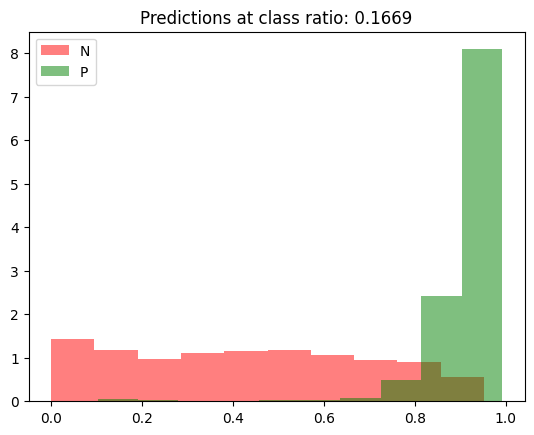

In [ ]:
plot_args = {"alpha": 0.5, "density": True}
plt.hist(probas[y_test==0], label = "N", color="r", **plot_args)
plt.hist(probas[y_test==1], label = "P", color="g", **plot_args)
plt.title(f"Predictions at class ratio: {y.sum() / len(y):.4f}")
plt.legend()
plt.show()

## Túltanulás elkerülése: early stopping

Képzeljük el, hogy élőben követjük a boosting folyamatát, tehát az egyes fák hozzáadását. Ha tanítás leválasztunk egy _belső validációs_ halmazt, és azon követjük az épülő modell teljesítményét, akkor elkerülhetjük a túltanulást azáltal, ha egy idő után leállítjuk a tanítást, mikor a teljesítmény a belső adathalmazon túl sokáig csökkent (nem javult).

Ezt a módszert hívjuk _early stopping_-nak. A `catboost` rendelkezik ezen funkcióval is.

Learning rate set to 0.056334
0:	test: 0.5738447	best: 0.5738447 (0)	total: 31.2ms	remaining: 15.6s
10:	test: 0.6701599	best: 0.6701599 (10)	total: 273ms	remaining: 12.1s
20:	test: 0.6992513	best: 0.6992513 (20)	total: 534ms	remaining: 12.2s
30:	test: 0.7291831	best: 0.7294750 (29)	total: 795ms	remaining: 12s
40:	test: 0.7424152	best: 0.7424152 (40)	total: 1.04s	remaining: 11.6s
50:	test: 0.7587556	best: 0.7587556 (50)	total: 1.28s	remaining: 11.2s
60:	test: 0.7628071	best: 0.7639587 (59)	total: 1.56s	remaining: 11.2s
70:	test: 0.7661817	best: 0.7670991 (68)	total: 1.8s	remaining: 10.9s
80:	test: 0.7702074	best: 0.7702074 (80)	total: 2.06s	remaining: 10.7s
90:	test: 0.7721353	best: 0.7745411 (88)	total: 2.3s	remaining: 10.4s
100:	test: 0.7764465	best: 0.7764465 (100)	total: 2.56s	remaining: 10.1s
110:	test: 0.7789133	best: 0.7789133 (110)	total: 2.81s	remaining: 9.84s
120:	test: 0.7824515	best: 0.7824515 (120)	total: 3.05s	remaining: 9.54s
130:	test: 0.7799430	best: 0.7831829 (121)	tot

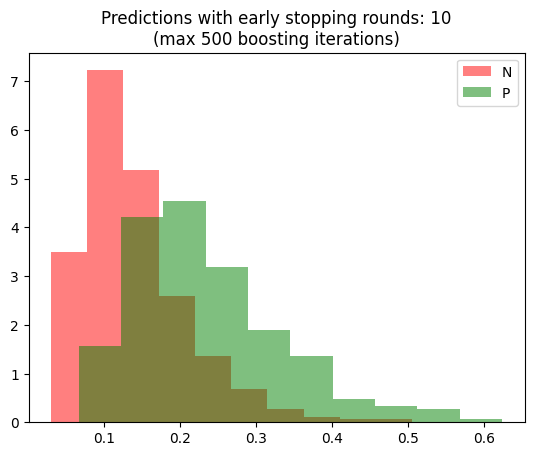

In [ ]:
X_train, X_inner, y_train, y_inner = train_test_split(X_train, y_train, test_size=0.33, random_state=42) # válasszuk le a belső validációs halmazt

model = CatBoostClassifier(
    iterations = 500,
    objective = "Logloss",
    eval_metric = "AUC",
    early_stopping_rounds = 10, # ha 10 lépésig nem javul az eval_set-en, állítsuk le a tanítást
    verbose=True
)

model.fit(X_train, y_train, eval_set=[(X_inner,y_inner)], verbose=10) # itt adjuk meg a belső validációs halmazt (ekkor a verbose már az ezen mért teljesítményt írja ki)

probas = model.predict_proba(X_test)[:,1]
print("ROC-AUC", roc_auc_score(y_test, probas))

plot_args = {"alpha": 0.5, "density": True}
plt.hist(probas[y_test==0], label = "N", color="r", **plot_args)
plt.hist(probas[y_test==1], label = "P", color="g", **plot_args)
plt.title(f"Predictions with early stopping rounds: 10\n(max 500 boosting iterations)")
plt.legend()
plt.show()

# Kiegészítés: Pipeline

Gyakran egy adaton ugyanazon változásokat hajtjuk végre. Ezeket zárhatjuk egy, jól kezelhető egységbe (ún. _pipeline_-ba) a scikit-learn pipeline modulja segítségével.

Részletek a scikit-learn idetartozó User guide-jában:
https://scikit-learn.org/stable/modules/compose.html#combining-estimators

Ennek bemutatásához a scikit-learnből is elérhető gradiens boosting klasszfikálót fogjuk használni:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
pipe = Pipeline([
    ("preproc", Normalizer()),
    ("clf", GradientBoostingClassifier())
])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preproc', Normalizer()),
                ('clf', GradientBoostingClassifier())])

In [ ]:
probas = pipe.predict_proba(X_test)[:,1]
roc_auc_score(y_test, probas)

0.7523560904384763

## Set parameters inside pipelines

In [ ]:
from tqdm import tqdm

In [ ]:
pipe = Pipeline([
    ("preproc", Normalizer(norm="l2")),
    ("clf", GradientBoostingClassifier(n_estimators=10))
])

results = []

for depth in tqdm(range(1,10)):
  #print(f"Max depth: {depth}", end='\r')

  pipe.set_params(clf__max_depth=depth) # szintaxis: <"name_in_pipe"__"param">
  pipe.fit(X_train, y_train)

  probas = pipe.predict_proba(X_test)[:,1]
  auc = roc_auc_score(y_test, probas)

  results.append({"max_depth": depth, "auc": auc})

pd.DataFrame.from_records(results)

100%|██████████| 9/9 [00:26<00:00,  2.89s/it]


,max_depth,auc
0,1,0.617047
1,2,0.658523
2,3,0.683270
3,4,0.686384
4,5,0.691338
5,6,0.699564
6,7,0.667976
7,8,0.636292
8,9,0.634706


# Gyakorlás: Kiegyensúlyozatlan adatok

[XKCD, 1739](https://www.explainxkcd.com/wiki/index.php/1739:_Fixing_Problems): Fixing problems

## Elmélet
Egy adathalmaz kiegyensúlyozatlanságának egy lehetséges (és gyakori) mérőszáma az $N/P$ arány, tehát a negatív osztály elemszáma osztva a pozitívéval. Ha ez az aránya $1/2$ alá csökken, vagy $2$ fölé nő, akkor kiegyensúlyozatlan adatról szokás már beszélni. (Gondoljunk bele, hogy ekkor az egyik osztály már legalább kétszer akkora, mint a másik.)

Kiegyensúlyozatlan adatokkal dolgozni nagy kihívás elé állíthat minket. Képzeljük el, hogy 10-szeres eltérés esetén és kis mintaszám mellett a pozitív osztályba olyan kevés elem tartozik, hogy nem nyerhető ki már értelmes minta, ami alapján osztályozni lehetne. Ezen nehézség áthidalására többféle módszer született, közös jellemzőjük, hogy általában a pozitív osztály _átsúlyozásával_ érik el az adatok ,,egyensúlyozását''. (Természetesen a súlyozás több helyütt is történhet, megvalósítás szerint: a hibák (FN,FP) átsúlyozásával, a mintavételezéskor a pozitív osztály preferálása).

Egy másik gyakori megoldás az _over_- vagy _undersampling_. Első esetben (oversampling) a kis osztályt (_minority_) ,,felfújjuk'' azáltal, hogy visszatételesen húzunk belőle (mesterségesen megnöveljük a méretét duplikációkkal); utóbbi esetén a nagy osztály(ok) (_majority_) random részhalmazát használjuk csak.


1. Mennyi egy teljesen kiegyensúlyozott adathalmaz ezen mérőszáma?
1. Milyen metrikákat érdemes használni, és melyeket nem, kiegyensúlyozatlan adatok esetén? Melyik torzít, és melyik nem érzékeny a kiegyensúlyozatlanságra?
1. Hogyan fejeznéd ki az $N/P$ arányt a $P$ és a $n$ (adathossz) ismeretében?
1. Mi az előnye és mi a hátránya az under- és oversamplingnek?

## Modellezés
1. Kísérletezz CatBoostClassifier-rel! Variáld meg egy kicsit az első klasszfikálást és futtasd újra a modell úgy, hogy néhány hiperparamétert a default-tól eltérő értékre állítottál. Javított vagy rontott az eredeti eredményen?
1. Kiegyensúlyozatlan adatok: a `catboost` egyik opciója, amivel a kiegyensúlyozatlan adatokat kezeli a `scale_pos_weight`. Ez, a nevének megfelelően, a pozitív osztály súlyát növeli meg a tanítás során. A szokásos értéke $N/P$. Megadni a következő módon lehet:
```
model = CatBoostClassifier(
    iterations = 100,
    objective = "Logloss",
    scale_pos_weight = 2.0, # N/P
    verbose=True
)
```
Csavargasd ezen hiperparméter értékét és nézd meg a hisztogramon a predikciók eloszlását! Mit tapasztalsz? Milyen érték mellett tetszik a legjobban az ábra? Szemmel hova raknád ott a thresholdot? Az $N/P$ arány jelen esetben mennyivel egyenlő?
1. A Colab környezete tartalmazza a scikit-learn egy kiegészítő csomagját is, az [`imblearn`](https://imbalanced-learn.org/stable/index.html), azaz imbalanced learning modult (Ha mégsem, akkor `!pip install -U imbalanced-learn
`). Bevezető feladatként készíts egy erősen kiegyensúlyozatlan adatot úgy, hogy az óra elején látott adat generáláskor a `if y[i] > 0 and np.random.rand() > 0.5:` sorban a 0.5 értékét felnöveled 0.2-re. Ezután oversamplinggel növeld meg a minoritás osztály méretét és végezz az adatokon klasszfikálást. Ábrázold az eredményeket, és nézd meg, hogy az oversampling során hány duplikát sorod keletkezett! Megjegyzés: a szintaxis a megszokott módon egyszerű:
```
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
```
további részletek [itt](https://imbalanced-learn.org/stable/over_sampling.html) találhatóak.
1. Hasonlítsd össze az előző eredményt, ha undersamplinggel csökkented a majority osztály méretét! Ehhez akár használhatod a már jól ismert `train_test_split` függvényt is (megfelelő `train_size` mellett):
```
X_resampled, _, y_resampled, _ = train_test_split(X[y==0],y[y==0], train_size=0.2)
X = np.concatenate([X_resampled,X[y==1]], axis=0)
y = np.concatenate([y_resampled,y[y==1]], axis=0)
```
Az `_` használata egy Python konvenció, arra utal, hogy az adott változóz a későbbiekben nem kívánjuk használni (de ettől függetlenül `_` egy valid változó, aminek értékét meg lehet nézni). Arra figyelj, hogy azért értelmes mennyiségű adat maradjon, ha kell, növeld az `n_samples` értékét!
1. Természetsen tovább lehet fejleszteni a fenti két módszert, ha mintavételezés helyett _prototípusokat_ generálunk, azaz pl. triviális undersampling helyett új adatokat adunk meg, de az eddig látottak alapján (reprezentatív, prototipikus adatokat. A [User guide] erről bővebben beszél. Ha érdekel, próbálj ki néhányat a Prototype generation módszerek közül is, és nézd meg, hogy túlteljesíti-e a hagyományos megközelítést!

# Gyakorlás: Pipeline
1. Pipeline-ba még hiperparaméter optimalizálást is lehet tenni. Ha adott például egy `pipe`, aminek a vége egy klasszifikáló (vagy regresszor), akkor a `GridSearchCV(pipe, param_grid=params)` paranccsal egy grid search-be tettük az _egész_ pipe-ot. A `params` megadása trükkös: mivel egy pipe-ban többféle modell is helyet foglal, meg kell mondanunk melyik modell hiperparaméterét adjuk meg. Erre szolgál, hogy a pipe konstruálásakor az egyes lépéseknek nevet adtunk. Ha pl. a pipe-ban van egy `("logreg", LogisticRegression())` elem, akkor a logisztikus regesszió penalty paraméterét `logreg__penalty` (dupla aláhúzás!) módon adjuk meg. A gyakorlat során használt pipe egy lehetséges param_grid-je:
```
params = {
    "preproc__norm": ["l1","l2","max"],
    "clf__n_estimators": [5,10,50,100]
}
```
Végezz hiperparaméter optimalizálást egy pipeline-on! Tetszőleges scikit-learn modellt és optimalizálási sémát (random vagy grid) használhatsz! CatBoostClassifiert sajnos nem lehet, a catboost fejlesztőinek egy érthető, de önkényes lépése miatt.

1. Nézegesd a scikit-learn GradientBoostingClassifiert, állítgasd a hiperparamétereit, tedd egy hiperparaméter optimalizálóba, helyezd pipeline-ba!


***
Ha bármikor elakadsz: Tech Support Cheat Sheet ([XKCD, 627](https://xkcd.com/627/))



# Házi feladat

Beküldési határidő:

- Első változat: április 27. 23:59:59
- Utolsó változat: május 4. 23:59:59

Beküldési útmutató:

- Mikor végeztél, mindig futtasd le az újra a kódod, hogy biztos nem maradt-e benne hiba (olyan kódot, ami nem fut le, sajnos nem tudunk elfogadni). Ezt a következőképp teheted meg:
1. Runtime / Restart and run all: újraindítja a sessiont, ha nincs bug a kódban, rendben lefut a végéig.
2. A kimenetekkel együtt töltsd le a notebookot `.ipynb` formátumban a gépedre.
3. A keletkezett `.ipnyb` fájlt töltsd fel a Teams megfelelő feladatához!

## Feladat

Mivel ez az utolsó házi feladat, lehet választani, hogy melyiket készíti el az ember, illetve akinek két házi feladat is hiányzik a kötelező 4-ből, az ezzel pótolhatja. Mindkét feladatot más esetben nem adhatjátok be, azonban továbbra is él a kötelező 4-en felül beküldött háziért járó +1 pont.*

1. A scikit-learn [`datasets`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) modulból válassz egy adathalmazt (akár a Loaders-ből, akár a Samples generatorból) és egy hozzá tartozó scikit-learn modellt (klasszfikációhoz klasszifikátort, regresszióhoz regresszort). Egy Pipeline-ban a predikció előtt végezz az adaton előfeldolgozást is ([`preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) modul, Normalizer vagy Scaler). Ezután a Pipeline-t rakd RandomSearchCV-be, és válassz minimum 3 hiperparamétert, de pipe elemenként legalább egyet. Végezd el a hiperparaméter optimalizálást tetszőleges keresztvalidálással. A predikciókat értékeld ki egy megfelelő metrikával és ábrázold a predikciókat egy megfelelő ábrán (pl klasszifikáció esetén hisztogram, regresszió esetén prediction display plot). A jó metrika választására külön figyelj, multilabel klasszifikálás esetén pl. az AUC nem jó! A scikit-learn [`metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) modul ebben is a segítségedre lehet.

1. Az imblearn [`datasets`](https://imbalanced-learn.org/stable/references/generated/imblearn.datasets.fetch_datasets.html#imblearn.datasets.fetch_datasets) modulból válassz egy kiegyensúlyozatlan adathalmazt, és egy tetszőleges scikit-learn modellt, amivel a modellezést el szeretnéd végezni. Válassz egy metrikát, amelyik a feladathoz illik. Hasonlítsd össze, hogy oversampling vagy undersampling esetén jobb a modell teljesítménye! Modellnek vagy használj gradiens boostert, ekkor nézd meg a scale_pos_weight paraméter állításával is a modell teljesítmény változását; vagy használhatsz egyszerű modellt is, de ekkor tegyél rá valami alapvető hiperparaméter optimalizálást néhány, tetszőlegesen választott hiperparaméterrel.

*_(Másként szólva most beküldött 2 háziért nem jár +2 pont, de akinek hiányzik, annak mindkettő el lesz fogadva -- jó megoldások esetén, természetesen.)_

In [ ]:
# te kódod